# Exploratory Data Analysis
***Dawid Lisek gr 2a***

Importowanie niezbędnych bibliotek.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Wczytywanie danych.

In [2]:
df = pd.read_csv("../Original_Data/10_POMORSKIE.csv")
df

,Unnamed: 0,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
0,0,5,Beko,38.0,bd.,5.0
1,1,4,Dyson,37.0,bd.,3.5
2,2,10,Samsung,20.0,bd.,2.5
3,3,14,Tefal,48.0,K,2.5
4,4,7,Electrolux,39.0,bd.,4.5
...,...,...,...,...,...,...
547,547,15,Electrolux,29.0,bd.,3.0
548,548,10,Samsung,45.0,bd.,2.5
549,549,7,Samsung,62.0,M,4.0
550,550,2,Tefal,37.0,K,4.0


Usunięcie kolumny Unnamed oraz stworzenie kopii danych.

In [3]:
df = df.drop(columns=['Unnamed: 0'])
df_copy=df.copy()
df.to_csv("../Analysis_Data/cleaned_data.csv")
df

,Dni od zakupu,Marka,Wiek kupującego,Płeć kupującego,Ocena
0,5,Beko,38.0,bd.,5.0
1,4,Dyson,37.0,bd.,3.5
2,10,Samsung,20.0,bd.,2.5
3,14,Tefal,48.0,K,2.5
4,7,Electrolux,39.0,bd.,4.5
...,...,...,...,...,...
547,15,Electrolux,29.0,bd.,3.0
548,10,Samsung,45.0,bd.,2.5
549,7,Samsung,62.0,M,4.0
550,2,Tefal,37.0,K,4.0


Informacje na temat danych.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Dni od zakupu    552 non-null    int64  
 1   Marka            552 non-null    object 
 2   Wiek kupującego  497 non-null    float64
 3   Płeć kupującego  552 non-null    object 
 4   Ocena            552 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 21.7+ KB


### Wykresy ilości poszczególnych ocen dla każdej marki ze względu na płeć głosujących.

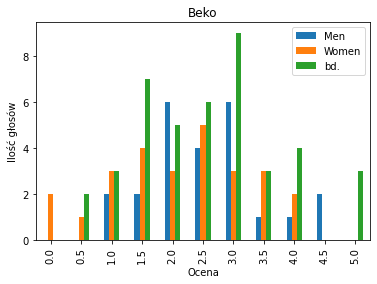

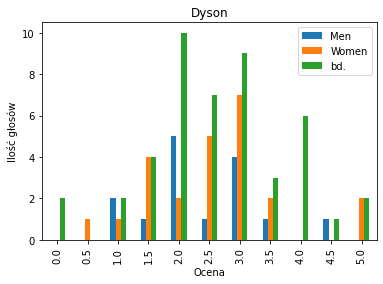

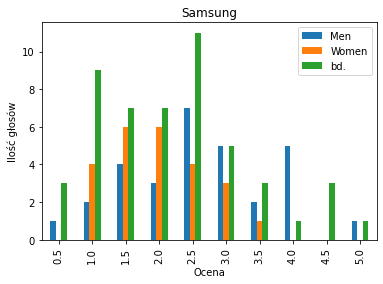

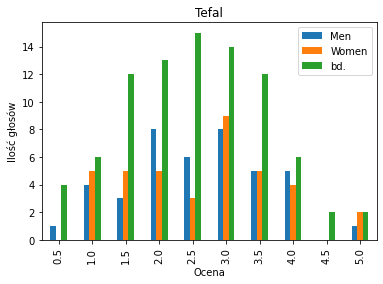

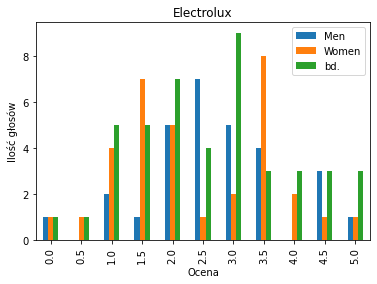

In [5]:
for i, marka in enumerate(df['Marka'].unique()):
    table_man = df.loc[(df['Marka'] == marka) & (df['Płeć kupującego'] =='M')] # uzyskanie tabeli dla mężczyzn oraz konkretnej marki
    brand_m = table_man.groupby('Ocena')['Płeć kupującego'].count() # zliczenie ilości osób głosujących na poszczególną ocenę
    table_woman = df.loc[(df['Marka'] == marka) & (df['Płeć kupującego'] =='K')] # uzyskanie tabeli dla kobiet oraz konkretnej marki
    brand_k = table_woman.groupby('Ocena')['Płeć kupującego'].count() # zliczenie ilości osób głosujących na poszczególną ocenę
    table_bd = df.loc[(df['Marka'] == marka) & (df['Płeć kupującego'] =='bd.')] # uzyskanie tabeli dla osób, które nie podały płci oraz konkretnej marki
    brand_bd = table_bd.groupby('Ocena')['Płeć kupującego'].count() # zliczenie ilości osób głosujących na poszczególną ocenę
    result = pd.concat([brand_m.to_frame(name='Men'), brand_k.to_frame(name='Women'), brand_bd.to_frame(name='bd.')], axis=1) # połączenie tabel dla każdej płci
    result = result.replace(np.NaN, 0) # usunięcie wartości NaN z tabeli oraz zastąpienie ich wartością 0
    result.plot.bar(title=marka, ylabel='Ilość głosów') # tworzenie wykresu
    result.to_csv(f"../Analysis_Data/rate_amount_for_{marka}.csv") # zapis danych do tabeli csv
    plt.show()


Przykładowa tabela zawierająca ilość poszczególnych głosów dla marki Electrolux.

In [6]:
result

,Men,Women,bd.
Ocena,,,
0.0,1.0,1,1
0.5,0.0,1,1
1.0,2.0,4,5
1.5,1.0,7,5
2.0,5.0,5,7
2.5,7.0,1,4
3.0,5.0,2,9
3.5,4.0,8,3
4.0,0.0,2,3


### Stworzenie tabeli zawierającej średnią ocenę, średnią ilość dni od zakupu, liczbę sprzedanych towarów oraz średni wiek klienta dla każdej marki.

Lista wszystkich marek.

In [7]:
brands = df_copy['Marka'].unique()
brands

array(['Beko', 'Dyson', 'Samsung', 'Tefal', 'Electrolux'], dtype=object)

In [8]:
Average_rate = [] # tabela średnich ocen
Average_days_from_purchase = [] # tabela średniej wartości dni od zakupu
Purchase_amount = [] # tabela ilości sprzedanych towarów
Average_client_age = [] # tabela średniego wieku clienta
for brand in brands:
    df = df_copy.loc[df_copy['Marka'] == brand] # wyszukanie wyszystkich danych dla poszczególnej marki
    Average_client_age.append(df['Wiek kupującego'].mean()) # obliczenie średniego wieku kupującego
    Average_rate.append(df['Ocena'].mean()) # obliczenie średniej oceny
    Average_days_from_purchase.append(df['Dni od zakupu'].mean()) # obliczenie średniej ilości dni od zakupu
    Purchase_amount.append(len(df.index)) # obliczenie ilości sprzedanych towarów

Stworzenie tabeli stats zawierającej statystyki dla każdej marki.

In [9]:
stats = pd.DataFrame({'Średnia ocena': Average_rate, 'Średnia ilość dni od zakupu' : Average_days_from_purchase, 'Liczba sprzedanych towarów': Purchase_amount, 'Średni wiek klienta': Average_client_age}, index=brands) # stworzenie tabeli stats
stats = stats.round({'Średnia ocena':3, 'Średnia ilość dni od zakupu': 2, 'Średni wiek klienta': 2}) # zaokrąglenie poszczególnych danych
stats.to_csv("../Analysis_Data/brand_statistics.csv") # zapisanie tabeli stats do pliku
stats

,Średnia ocena,Średnia ilość dni od zakupu,Liczba sprzedanych towarów,Średni wiek klienta
Beko,2.446,6.49,92,39.43
Dyson,2.582,7.27,85,40.15
Samsung,2.279,7.36,104,40.50
Tefal,2.567,6.70,165,39.46
Electrolux,2.571,7.37,106,39.78


Wykres liczby sprzedanych towarów przez poszczególne marki.

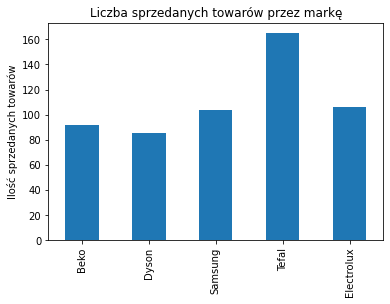

In [10]:
stats['Liczba sprzedanych towarów'].plot.bar(title='Liczba sprzedanych towarów przez markę', ylabel='Ilość sprzedanych towarów')
plt.show()

Pozostałe dane z tabeli stats nie zostały przedstawione na osobnych wykresach ze względu na niewielką różnicę w tych danych.